# [과제 3] 로지스틱 회귀분석
### - sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.
### - 성능지표를 계산하고 이에 대해 해석해주세요.
### - 성능 개선을 시도해주세요. (어떠한 성능지표를 기준으로 개선을 시도했는지, 그 이유도 함께 적어주세요.)\\
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [62]:
data = pd.read_csv("assignment3_creditcard.csv")

In [63]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


In [64]:
#데이터 전처리
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

#머신러닝 모델 구축 / 평가
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,accuracy_score,confusion_matrix,recall_score,precision_score

#데이터 시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#한글 폰트
plt.style.use('seaborn')
plt.rc('font', family='DejaVu Sans')
plt.rc('axes', unicode_minus=False)

In [65]:
X = data.drop(["Class"], axis=1)
y = data["Class"]

## **데이터 전처리**

In [66]:
#train / test set 분리
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.3,random_state=2021)

In [67]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20074, 28) (8604, 28) (20074,) (8604,)


In [68]:
# Logistic Regression 
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

Text(0.5, 0.98, 'Histogram')

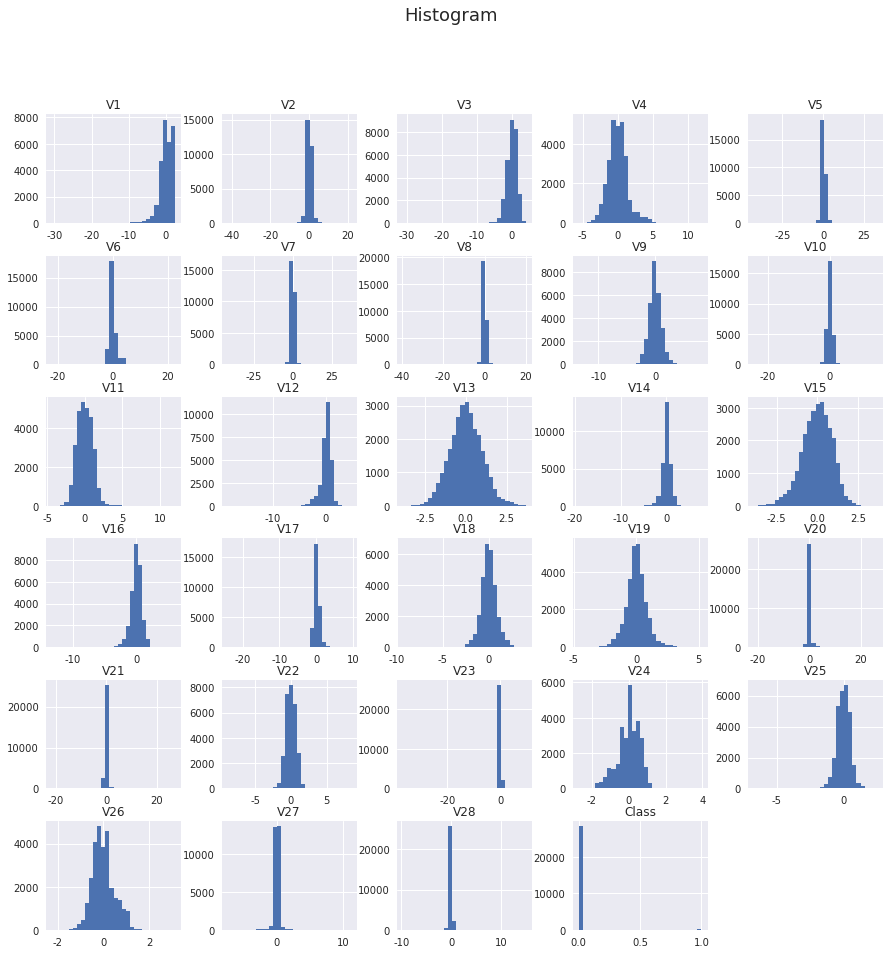

In [69]:
data[data.columns].hist(bins=30, figsize=(15,15))
plt.suptitle("Histogram", fontsize=18)

In [70]:
model=LogisticRegression()
model.fit(X_train,y_train)
model.predict_proba(X_test)

array([[9.99667651e-01, 3.32349298e-04],
       [9.98421765e-01, 1.57823468e-03],
       [9.96265036e-01, 3.73496369e-03],
       ...,
       [9.99613175e-01, 3.86825338e-04],
       [9.99306580e-01, 6.93420207e-04],
       [9.96082010e-01, 3.91798980e-03]])

In [71]:
#칼럼에 따른 beta, exp(beta) 확인
column_name=["const"]+X.columns.tolist()
beta=np.concatenate([model.intercept_,model.coef_.reshape(-1)]).round(2)


#beta 곱하기 X
Xbeta=np.matmul(np.c_[np.ones(X_test.shape[0]),X_test],beta.reshape(-1,1))

#P(Y=1) 계산
P_1=1/(1+np.exp(-Xbeta))
P_1

array([[0.00033134],
       [0.0015647 ],
       [0.00358442],
       ...,
       [0.00039508],
       [0.00070398],
       [0.00392776]])

## **성능 평가하기**

### **cutoff 조절**

In [72]:
Cut_off=np.linspace(0.01,0.99,10) #cut off 값 만들기
for cutoff in Cut_off:
    y_pred=np.where(P_1.reshape(-1)>=cutoff,1,0)
    #cutoff 보다 크면 1 (유방암), 아니면 0 (유방암 X)
    acc=accuracy_score(y_true=y_test,y_pred=y_pred) #정확도
    recall=recall_score(y_true=y_test,y_pred=y_pred) #민감도
    precision=precision_score(y_true=y_test,y_pred=y_pred) #정밀도
    
    print(f"정확도 : {acc : 0.2f}",f"민감도 : {recall : 0.2f}",f"정밀도 : {precision : 0.2f}",f"cut off : {cutoff : 0.2f}")

정확도 :  0.98 민감도 :  0.92 정밀도 :  0.28 cut off :  0.01
정확도 :  1.00 민감도 :  0.87 정밀도 :  0.88 cut off :  0.12
정확도 :  1.00 민감도 :  0.86 정밀도 :  0.93 cut off :  0.23
정확도 :  1.00 민감도 :  0.84 정밀도 :  0.93 cut off :  0.34
정확도 :  1.00 민감도 :  0.84 정밀도 :  0.95 cut off :  0.45
정확도 :  1.00 민감도 :  0.84 정밀도 :  0.96 cut off :  0.55
정확도 :  1.00 민감도 :  0.84 정밀도 :  0.97 cut off :  0.66
정확도 :  1.00 민감도 :  0.83 정밀도 :  0.97 cut off :  0.77
정확도 :  1.00 민감도 :  0.78 정밀도 :  0.97 cut off :  0.88
정확도 :  1.00 민감도 :  0.70 정밀도 :  0.97 cut off :  0.99


### **ROC curve 그리기**

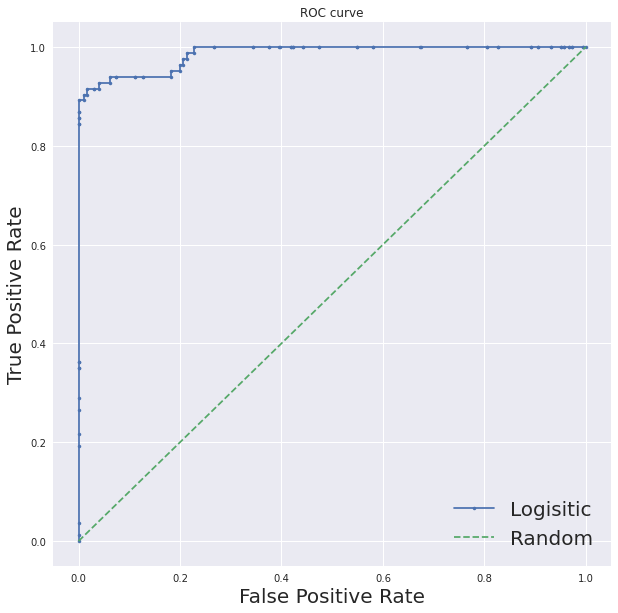

In [73]:
#X_test에 대해 y=1(유방암)일 확률
probs=model.predict_proba(X_test)[:,1]

#ROC curve x축, y축
model_fpr, model_tpr, threshold1=roc_curve(y_test,probs)

#random은 유방암 유무를 랜덤하게 판정한 것
random_fpr,random_tpr, threshold2=roc_curve(y_test,[0 for i in range(X_test.__len__())])

#plot
plt.figure(figsize=(10,10))
plt.plot(model_fpr,model_tpr,marker=".",label="Logisitic")
plt.plot(random_fpr,random_tpr,linestyle="--",label="Random")

#axis
plt.xlabel("False Positive Rate",size=20)
plt.ylabel("True Positive Rate",size=20)

#show the legend
plt.legend(fontsize=20)

plt.title("ROC curve")
plt.show()

In [74]:
# 위의 ROC그래프를 지표로 사용할 것이다. 그 이유는 현재 False Positive Rate가 낮고 
# True Positve Rate가 높은 부분에서 정확도가 낮은 것을 확인 할 수 있는데
# 이 부분을 집중적으로 개선할 예정이기 때문에 시각화가 좋은 ROC Curve를 사용할 것이다.

# 성능개선하기

In [75]:
data.Class.value_counts()

0    28432
1      246
Name: Class, dtype: int64

## 이상치 제거

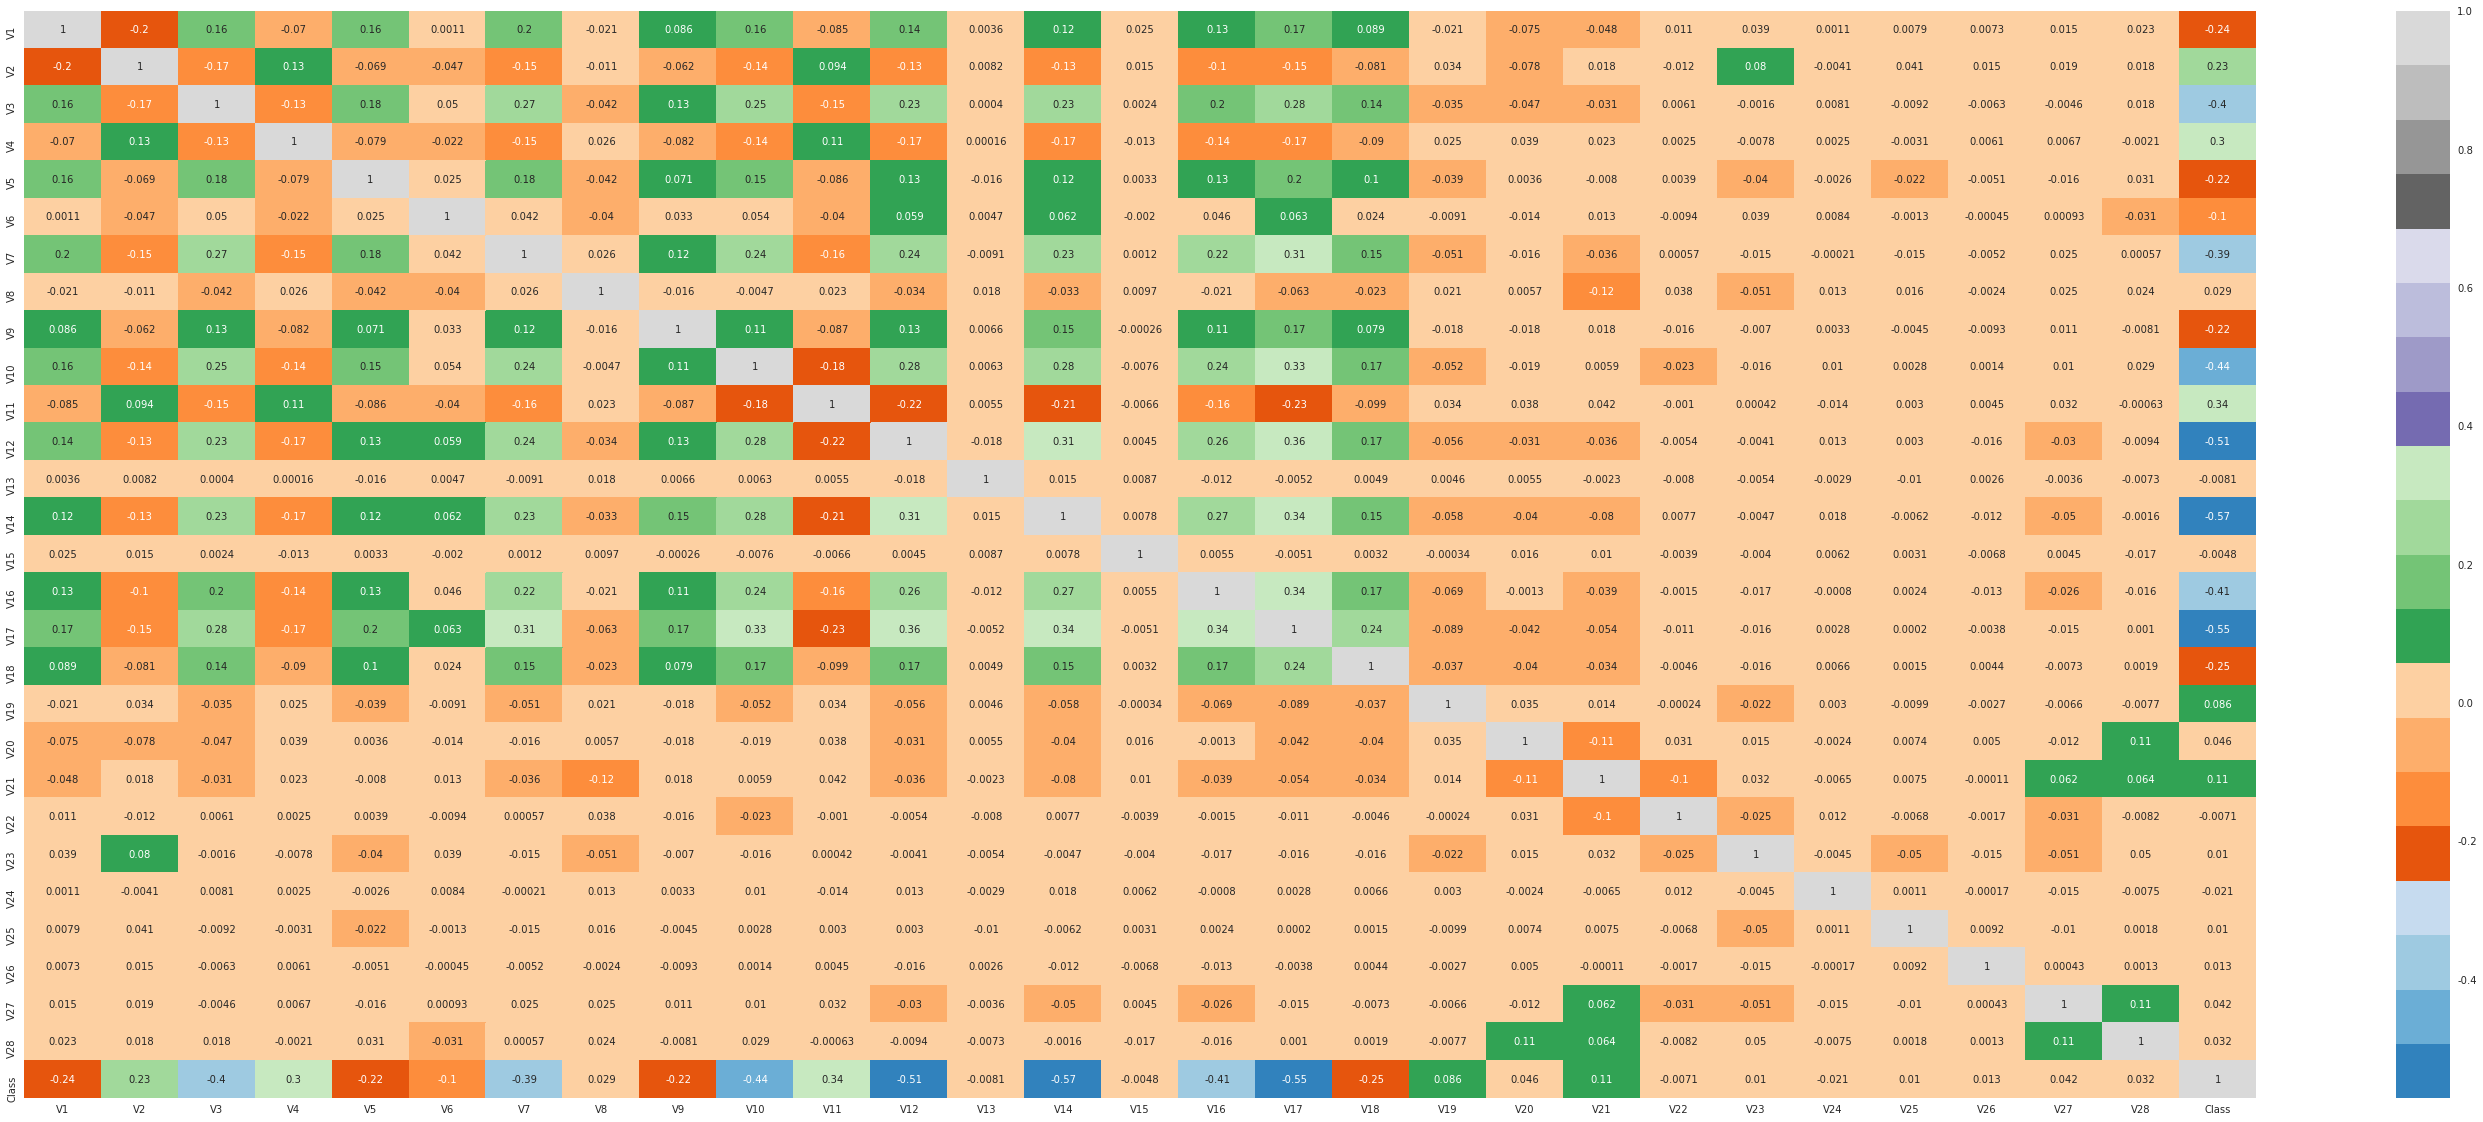

In [76]:
plt.figure(figsize = (50,20))
sns.heatmap(data.corr(), annot = True, cmap="tab20c")
plt.show()

In [77]:
def get_outlier(df, column, weight):
    fraud = data[data['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    low_val = quantile_25 - iqr_weight
    high_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < low_val) | (fraud > high_val)].index
    return outlier_index

In [78]:
data.drop([15432, 11556], axis=0, inplace=True)

## 치우쳐진 값 완화

- 데이터가 매우 치우쳐져 있다.
- 이를 SMOTE를 사용하여 개선할 것이다.
     - SMOTE는 Synthetic Minority Over-sampling Technique의 약자로, 대표적인 오버 샘플링 기법 중 하나이다. 이는 낮은 비율로 존재하는 클래스의 데이터를 최근접 이웃[k-NN 알고리즘] 알고리즘을 활용하여 새롭게 생성하는 방법이다. 오버 샘플링 기법 중 단순 무작위 추출을 통해 데이터의 수를 늘리는 방법도 존재하는데, 데이터를 단순하게 복사하기 때문에 과적합 문제가 발생하기도 한다. 이에 반해 SMOTE는 알고리즘을 기반으로 데이터를 생성하므로, 과적합 발생 가능성이 단순 무작위 방법보다 적다.


In [79]:
# https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/
data.Class.value_counts()

0    28432
1      244
Name: Class, dtype: int64

In [80]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE

oversample =SMOTE(random_state = 2)
X_train_res, y_train_res = oversample.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


Before OverSampling, counts of label '1': 163
Before OverSampling, counts of label '0': 19911 

After OverSampling, the shape of train_X: (39822, 28)
After OverSampling, the shape of train_y: (39822,) 

After OverSampling, counts of label '1': 19911
After OverSampling, counts of label '0': 19911


In [81]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# apply near miss
from imblearn.under_sampling import NearMiss

oversample =NearMiss()
  
X_train_miss, y_train_miss = oversample.fit_resample(X_train, y_train.ravel())
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 163
Before Undersampling, counts of label '0': 19911 

After Undersampling, the shape of train_X: (326, 28)
After Undersampling, the shape of train_y: (326,) 

After Undersampling, counts of label '1': 163
After Undersampling, counts of label '0': 163


In [82]:
from sklearn.metrics import confusion_matrix, classification_report
# train the model on train set
lr2 = LogisticRegression()
lr2.fit(X_train_miss, y_train_miss.ravel())
predictions = lr2.predict(X_test)
  
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93      8521
           1       0.06      0.92      0.12        83

    accuracy                           0.86      8604
   macro avg       0.53      0.89      0.52      8604
weighted avg       0.99      0.86      0.92      8604



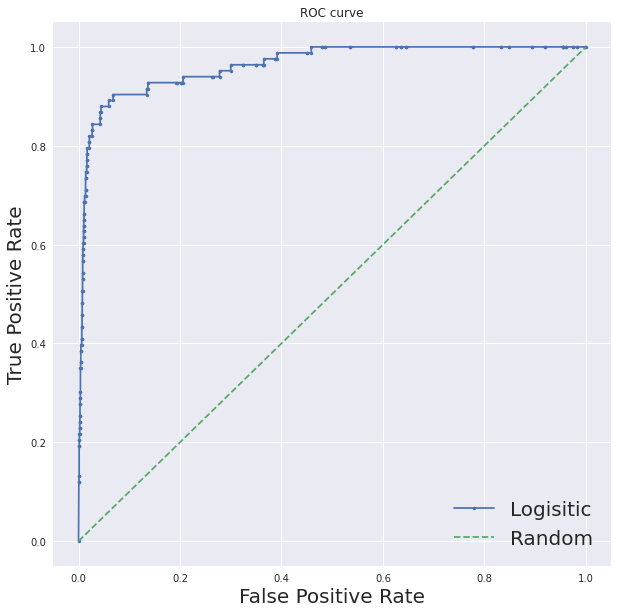

In [83]:
#X_test에 대해 y=1(유방암)일 확률
probs=lr2.predict_proba(X_test)[:,1]

#ROC curve x축, y축
model_fpr, model_tpr, threshold1=roc_curve(y_test,probs)

#random은 유방암 유무를 랜덤하게 판정한 것
random_fpr,random_tpr, threshold2=roc_curve(y_test,[0 for i in range(X_test.__len__())])

#plot
plt.figure(figsize=(10,10))
plt.plot(model_fpr,model_tpr,marker=".",label="Logisitic")
plt.plot(random_fpr,random_tpr,linestyle="--",label="Random")

#axis
plt.xlabel("False Positive Rate",size=20)
plt.ylabel("True Positive Rate",size=20)

#show the legend
plt.legend(fontsize=20)

plt.title("ROC curve")
plt.show()

### 오히려 정확도가 낮아진걸로 봐서는 이 데이터에 있어 SMOTE는 그렇게 좋은 생성 방법이 아니었던 것 같다.